In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [01:47<00:00, 98.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Unavailable!


In [4]:
# Load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [5]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['fire', 'nofire']


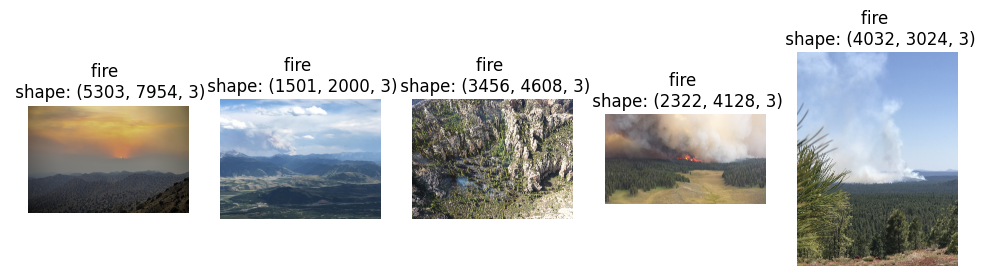

In [6]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

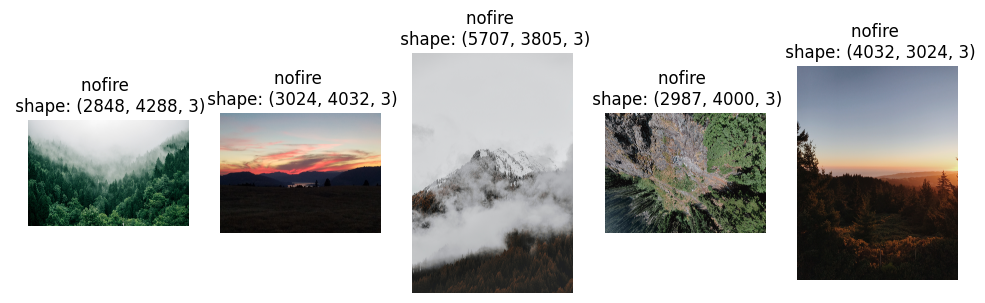

In [7]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
# prompt: Briefly mention the improvisations done by you:

The provided code downloads a wildfire dataset, checks for GPU availability, and displays some sample images from two classes.  Here's a breakdown of potential improvements:

1. **Dataset Exploration:**  Instead of just displaying images from the first two classes, the code could provide a more comprehensive overview.  This could include:
    *   Displaying sample images from *all* classes.
    *   Showing the number of images per class to understand class distribution (potential imbalances).
    *   Calculating basic image statistics (mean, standard deviation of pixel values).

2. **Data Augmentation:**  The code lacks data augmentation, a crucial technique for image classification tasks, especially when dealing with limited data.  Adding data augmentation (rotation, flips, shifts, etc.) using `ImageDataGenerator` will improve the model's robustness and generalization.

3. **Model Definition and Training:** The code downloads and explores the data, but it does *not* build or train a model.  The next steps would be to define a convolutional neural network (CNN) architecture using Keras and train it on the dataset.  This should include:
    *   Creating a `Sequential` model with appropriate `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, and `Dropout` layers.
    *   Compiling the model with a suitable loss function (e.g., binary cross-entropy or categorical cross-entropy), optimizer (e.g., Adam), and metrics (e.g., accuracy).
    *   Using `flow_from_directory` to efficiently load and augment the training and validation data.
    *   Training the model using `model.fit` and validating its performance on the validation set.

4. **Hyperparameter Tuning:** Experimentation with different model architectures, hyperparameters (e.g., learning rate, number of layers, filters), optimizers, and augmentation parameters will be necessary to achieve optimal performance.

5. **Model Evaluation:** Once trained, the model's performance should be thoroughly evaluated on the test set using appropriate metrics (e.g., precision, recall, F1-score, confusion matrix).

6. **Error Analysis:**  Analyzing the misclassified images can provide insights into the model's weaknesses and guide further improvements.


Implementing these improvements will make the code a complete and robust solution for wildfire image classification.
